In [1]:
import pandas as pd
import numpy as np
import datetime as dt

## The main idea is to apply operations of date frame/series to this special format, (time) series. 
refer to https://edu.csdn.net/course/detail/5410
### 1. create data_range to create ts index


In [2]:
#1. create data_range to create ts index
rng = pd.date_range('2018/01/01', periods=20, freq='3D')   
rng

#can be 'year-month-day' or using / to seperate; 1/1/2018; or use dt.datetime(2018,1,1) to replace
#freq= can be 'H D M ' but not Y for year; also can be '5D' means 'five days'
#also freq = '1D2H' is fine

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-07', '2018-01-10',
               '2018-01-13', '2018-01-16', '2018-01-19', '2018-01-22',
               '2018-01-25', '2018-01-28', '2018-01-31', '2018-02-03',
               '2018-02-06', '2018-02-09', '2018-02-12', '2018-02-15',
               '2018-02-18', '2018-02-21', '2018-02-24', '2018-02-27'],
              dtype='datetime64[ns]', freq='3D')

### 2. with the time index above, create pandas series

In [3]:
#2. with the time index above, create pandas series
ts = pd.Series(np.random.randn(len(rng)), index=rng)   #np.random.randn -> dtand normal

print(ts)

2018-01-01   -1.090484
2018-01-04   -2.431643
2018-01-07    0.295874
2018-01-10   -0.456703
2018-01-13    0.526778
2018-01-16   -0.595984
2018-01-19   -3.105484
2018-01-22    0.744400
2018-01-25    1.248914
2018-01-28   -0.002352
2018-01-31    1.062919
2018-02-03   -0.802175
2018-02-06    0.487621
2018-02-09   -0.620189
2018-02-12    1.432849
2018-02-15   -0.180358
2018-02-18   -1.720224
2018-02-21   -0.232209
2018-02-24   -0.172003
2018-02-27   -0.139944
Freq: 3D, dtype: float64


### 3. other operations

In [4]:
#use 'truncate' to fileter
#help(pd.DataFrame.truncate)

ts.truncate( before='2018-01-02', after='2018-01-18' )   

2018-01-04   -2.431643
2018-01-07    0.295874
2018-01-10   -0.456703
2018-01-13    0.526778
2018-01-16   -0.595984
Freq: 3D, dtype: float64

In [5]:
print(ts['2018-01-04'])
print(ts['2018-01-01':'2018-02-14'])

-2.43164330607
2018-01-01   -1.090484
2018-01-04   -2.431643
2018-01-07    0.295874
2018-01-10   -0.456703
2018-01-13    0.526778
2018-01-16   -0.595984
2018-01-19   -3.105484
2018-01-22    0.744400
2018-01-25    1.248914
2018-01-28   -0.002352
2018-01-31    1.062919
2018-02-03   -0.802175
2018-02-06    0.487621
2018-02-09   -0.620189
2018-02-12    1.432849
Freq: 3D, dtype: float64


### 4. Timestamp, time period and Timedelta

In [6]:
#timestamp
print(pd.Timestamp('2018-1-2'))
print(pd.Timestamp('2018-1-2 20'))
print(pd.Timestamp('2018-1-2 20:25:59'))

2018-01-02 00:00:00
2018-01-02 20:00:00
2018-01-02 20:25:59


In [7]:
#time period
pd.Period('2018-01-03')

Period('2018-01-03', 'D')

In [8]:
pd.Period('2018-02')

Period('2018-02', 'M')

In [9]:
#Timedelta is to calculate the difference of time
print (pd.Timedelta('5 days'))
print(pd.Period('2018-01-01 12:12:12') + pd.Timedelta('20M')) #M is minutes not monthb because this is timestamp not date stamp

#we can use 'ts.to_period' to convert 

5 days 00:00:00
2018-01-01 12:32:12


### 5.Resampling
#### There are two kinds of resampling, up and down sampling

In [10]:
rng2 = pd.date_range('2018-1-1',periods=100, freq='D')
ts2 = pd.Series(np.random.randn(len(rng2)), index=rng2)
ts2.head(5)

2018-01-01    1.222682
2018-01-02   -0.611481
2018-01-03    0.489759
2018-01-04    0.507488
2018-01-05   -0.676797
Freq: D, dtype: float64

In [11]:
ts2.resample('M').sum()

2018-01-31     7.928856
2018-02-28    10.994644
2018-03-31    -7.876208
2018-04-30     2.012570
Freq: M, dtype: float64

In [12]:
ts3 = ts2.resample('10D').mean()
ts3

2018-01-01   -0.019023
2018-01-11    0.211811
2018-01-21    0.633052
2018-01-31    0.701227
2018-02-10   -0.080584
2018-02-20    0.397204
2018-03-02   -0.067822
2018-03-12    0.007823
2018-03-22   -0.678960
2018-04-01    0.201257
Freq: 10D, dtype: float64

In [13]:
### insert missing vales
print(ts3.resample('D').asfreq())

ts3.resample('D').ffill(2)
ts3.resample('D').bfill(2)

2018-01-01   -0.019023
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-06         NaN
2018-01-07         NaN
2018-01-08         NaN
2018-01-09         NaN
2018-01-10         NaN
2018-01-11    0.211811
2018-01-12         NaN
2018-01-13         NaN
2018-01-14         NaN
2018-01-15         NaN
2018-01-16         NaN
2018-01-17         NaN
2018-01-18         NaN
2018-01-19         NaN
2018-01-20         NaN
2018-01-21    0.633052
2018-01-22         NaN
2018-01-23         NaN
2018-01-24         NaN
2018-01-25         NaN
2018-01-26         NaN
2018-01-27         NaN
2018-01-28         NaN
2018-01-29         NaN
2018-01-30         NaN
                ...   
2018-03-03         NaN
2018-03-04         NaN
2018-03-05         NaN
2018-03-06         NaN
2018-03-07         NaN
2018-03-08         NaN
2018-03-09         NaN
2018-03-10         NaN
2018-03-11         NaN
2018-03-12    0.007823
2018-03-13         NaN
2018-03-14         NaN
2018-03-15 

2018-01-01   -0.019023
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-06         NaN
2018-01-07         NaN
2018-01-08         NaN
2018-01-09    0.211811
2018-01-10    0.211811
2018-01-11    0.211811
2018-01-12         NaN
2018-01-13         NaN
2018-01-14         NaN
2018-01-15         NaN
2018-01-16         NaN
2018-01-17         NaN
2018-01-18         NaN
2018-01-19    0.633052
2018-01-20    0.633052
2018-01-21    0.633052
2018-01-22         NaN
2018-01-23         NaN
2018-01-24         NaN
2018-01-25         NaN
2018-01-26         NaN
2018-01-27         NaN
2018-01-28         NaN
2018-01-29    0.701227
2018-01-30    0.701227
                ...   
2018-03-03         NaN
2018-03-04         NaN
2018-03-05         NaN
2018-03-06         NaN
2018-03-07         NaN
2018-03-08         NaN
2018-03-09         NaN
2018-03-10    0.007823
2018-03-11    0.007823
2018-03-12    0.007823
2018-03-13         NaN
2018-03-14         NaN
2018-03-15 

In [14]:
ts.resample('D').interpolate('linear')  
#method : {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’,

2018-01-01   -1.090484
2018-01-02   -1.537537
2018-01-03   -1.984590
2018-01-04   -2.431643
2018-01-05   -1.522471
2018-01-06   -0.613298
2018-01-07    0.295874
2018-01-08    0.045015
2018-01-09   -0.205844
2018-01-10   -0.456703
2018-01-11   -0.128876
2018-01-12    0.198951
2018-01-13    0.526778
2018-01-14    0.152524
2018-01-15   -0.221730
2018-01-16   -0.595984
2018-01-17   -1.432484
2018-01-18   -2.268984
2018-01-19   -3.105484
2018-01-20   -1.822190
2018-01-21   -0.538895
2018-01-22    0.744400
2018-01-23    0.912571
2018-01-24    1.080742
2018-01-25    1.248914
2018-01-26    0.831825
2018-01-27    0.414736
2018-01-28   -0.002352
2018-01-29    0.352738
2018-01-30    0.707829
2018-01-31    1.062919
2018-02-01    0.441221
2018-02-02   -0.180477
2018-02-03   -0.802175
2018-02-04   -0.372243
2018-02-05    0.057689
2018-02-06    0.487621
2018-02-07    0.118351
2018-02-08   -0.250919
2018-02-09   -0.620189
2018-02-10    0.064157
2018-02-11    0.748503
2018-02-12    1.432849
2018-02-13 

### 6. Moving Window

In [15]:
window = ts2.rolling(window=5)
window.mean()

#pandas window use the data previous this number, instead of center in this point

2018-01-01         NaN
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05    0.186330
2018-01-06   -0.160682
2018-01-07    0.101609
2018-01-08   -0.138178
2018-01-09   -0.251960
2018-01-10   -0.224376
2018-01-11   -0.340880
2018-01-12   -0.519253
2018-01-13   -0.104516
2018-01-14    0.271325
2018-01-15    0.740774
2018-01-16    0.804050
2018-01-17    0.801271
2018-01-18    0.488672
2018-01-19    0.193892
2018-01-20   -0.317153
2018-01-21    0.014589
2018-01-22    0.262123
2018-01-23    0.450373
2018-01-24    0.539400
2018-01-25    0.593588
2018-01-26    0.386522
2018-01-27    0.241941
2018-01-28    0.138735
2018-01-29    0.287666
2018-01-30    0.672516
                ...   
2018-03-12   -0.642681
2018-03-13   -0.388428
2018-03-14   -0.537098
2018-03-15   -0.285212
2018-03-16   -0.383176
2018-03-17    0.048801
2018-03-18    0.234537
2018-03-19    0.090775
2018-03-20    0.290749
2018-03-21    0.398823
2018-03-22    0.073144
2018-03-23   -0.067844
2018-03-24 

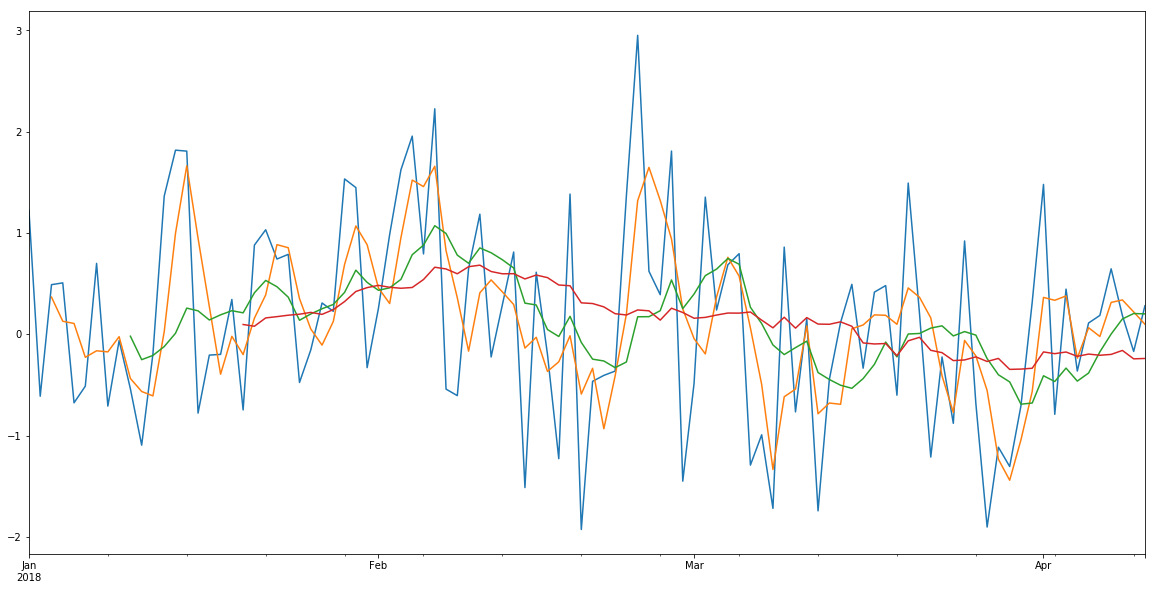

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(20,10))

ts2.plot()
ts2.rolling(window=3).mean().plot()
ts2.rolling(window=10).mean().plot()
ts2.rolling(window=20).mean().plot()
#smoother if the window range is bigger